# 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [1]:
from sklearn import datasets, metrics

In [2]:
digits=datasets.load_boston()
digits.target[:5]  # array([24. , 21.6, 34.7, 33.4, 36.2]) <== We need regression 

array([24. , 21.6, 34.7, 33.4, 36.2])

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [4]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [5]:
model= GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
max_depth=[3,4,5]
learning_rate=[0.98,1, 1.02]
min_samples_leaf=[1,2]
#min_samples_split=[0.5,1]
alpha =[0.8,0.9, 0.95]
grid =dict(max_depth=max_depth, learning_rate=learning_rate, min_samples_leaf=min_samples_leaf, alpha=alpha)

In [7]:
grid_search = GridSearchCV(model,grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    8.2s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
grid_result.best_params_

{'alpha': 0.95, 'learning_rate': 0.98, 'max_depth': 3, 'min_samples_leaf': 2}

In [9]:
grid_result.best_score_

-22.23438332109257

In [10]:
model=GradientBoostingRegressor(alpha=0.8, learning_rate=1, max_depth=3, min_samples_leaf=2)
model.fit(x_train, y_train)
pred=model.predict(x_test)
mse =metrics.mean_squared_error(pred, y_test)
mse

24.833560568227906

In [11]:
y_test

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4])

In [12]:
pred

array([26.783357  , 40.25060935, 20.11669055, 13.38008146, 20.76639293,
       20.88066429, 21.37584929, 19.81808815, 29.57764387, 20.96857336,
        4.88069448, 12.28108364, 12.00069969, 11.15298661, 53.09716579,
       28.08755671, 18.1582699 , 33.81111169, 27.57042693, 21.63079774,
       23.72803327, 21.18168406, 20.04924094, 27.02334212, 21.71013627,
       26.11115829, 18.33891919, 20.01139954, 41.76671885, 21.07503371,
       12.37235978, 22.13062364, 18.77150678, 20.66697775, 22.02584128,
       20.70116151,  8.95463063, 17.69980929, 13.71637409,  8.94919662,
       21.81442792, 23.61623307, 23.50571343, 11.57816261, 19.33566237,
       21.11797064, 15.30156847, 22.18846332, 17.6488621 , 22.92307269,
       20.19477724, 21.57100731, 20.66074971, 28.76863507, 14.09039387,
       17.63561864, 17.47127403, 15.85135801, 11.32851524, 20.42684543,
       23.13727359, 22.27411657, 28.27052607, 27.04582046, 19.32390296,
       30.94923169, 20.17607688, 16.64513709, 10.24446289, 25.76

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

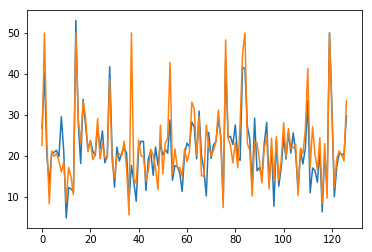

In [20]:
plt.plot(range(len(pred)),pred)
plt.plot(range(len(pred)),y_test)
plt.show()